 Рассматривать визуализацию кластеризации мы будем на примере данных об арендном жилье в Нью-Йорке, размещённом на платформе Airbnb. Нас интересуют координаты (широта и долгота) жилья, которое можно арендовать, и стоимость аренды.

In [2]:
# импортируем библиотеки, которые нам понадобятся для работы с датафреймом, кластеризацией и визуализацией
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv("airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


В данном датасете довольно много данных, например имя арендодателя, минимальное время аренды. Нас интересуют только широта (столбец latitude) и долгота (столбец longitude), а также цена (столбец price) аренды квартиры. Визуализируем данные, основываясь на широте и долготе:

<Axes: xlabel='latitude', ylabel='longitude'>

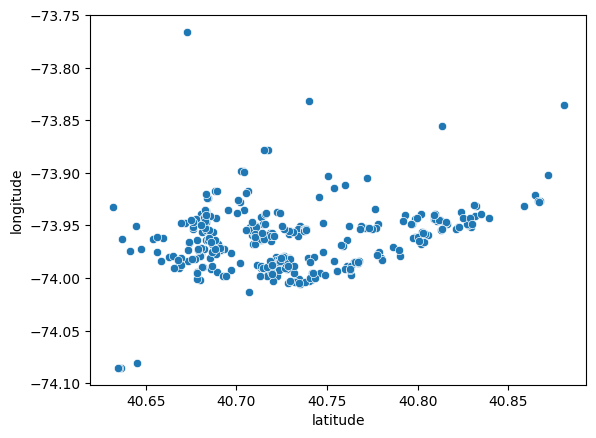

In [3]:
sns.scatterplot(x=df.latitude, y=df.longitude)

### ДИАГРАММА РАССЕЯНИЯ

Самый простой способ визуализировать получившиеся кластеры — выделить разными цветами данные, принадлежащие к разным кластерам. В этом поможет диаграмма рассеяния, на которой по двум осям откладываются значения признаков объекта. С помощью такой простой визуализации легко понять, правильно ли прошла кластеризация, действительно ли разные объекты оказались в разных классах, а похожие — в одном.

выделим на графике центроиды кластеров. Для этого построим модель k-means-кластеризации, выделив в данных шесть кластеров, а далее найдём центроиды и визуализируем результаты.

In [4]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

Создадим новые столбцы (cen_x, cen_y, color) в датафрейме. В зависимости от значения в ячейке clusters в ячейках cen_x, cen_y и color будут разные значения: если значение в clusters — 0, в cen_x и cen_y будут указаны координаты центроида нулевого кластера и цвет нулевого кластера.

In [5]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,40.677313,-73.967081,#DF2020
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,40.767529,-73.973729,#2095DF
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,4,40.818934,-73.941395,#20DFC5
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0,40.677313,-73.967081,#DF2020
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,4,40.818934,-73.941395,#20DFC5


<Axes: xlabel='latitude', ylabel='longitude'>

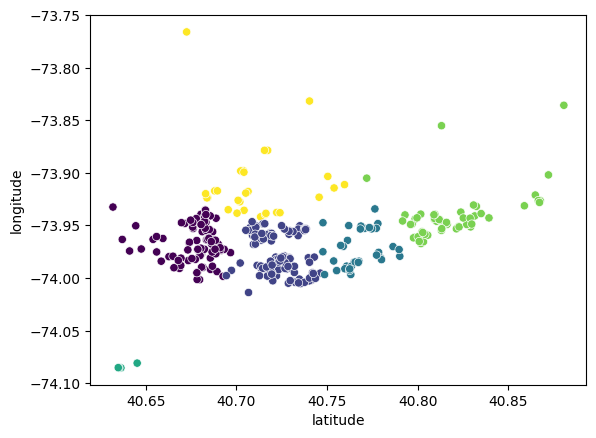

In [6]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.clusters)

Также могут встретиться перекрывающиеся кластеры — а таком случае нужно, чтобы цвета объектов в кластере были полупрозрачными. В этом поможет переменная alpha: чем ближе её значение к 1, тем менее прозрачны объекты на графике.

<Axes: xlabel='latitude', ylabel='longitude'>

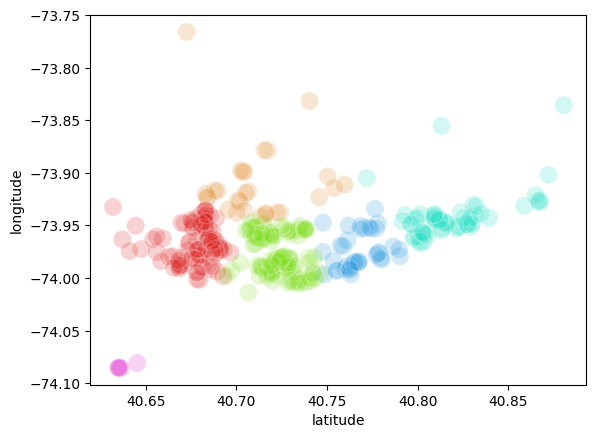

In [7]:
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, alpha=0.2, s=170)

<Axes: xlabel='latitude', ylabel='longitude'>

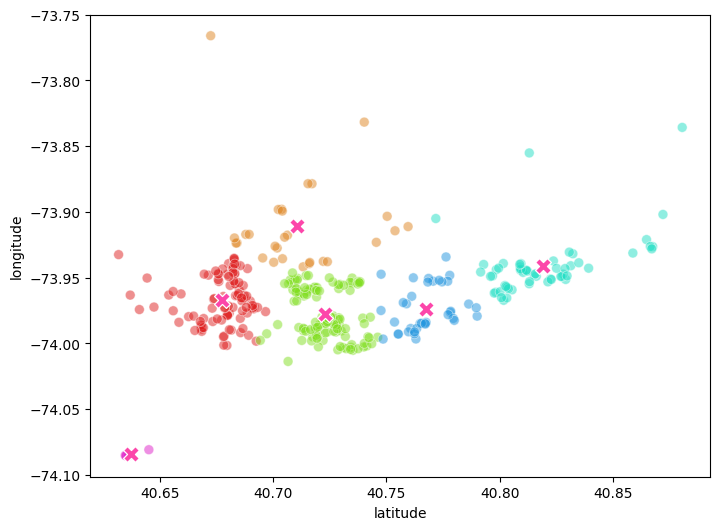

In [8]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

Итак, мы визуализировали кластеры, а также отметили центроиды этих кластеров. Визуализация центроидов кластеров помогает понять, насколько элементы кластера находятся далеко или близко к центроиду. Если элемент находится далеко от центроида и от других элементов, то он сильно непохож на элементы своего кластера.

Если в одном пространстве много скоплений точек, при визуализации мы можем увеличить прозрачность точек с помощью параметра alpha. Таким образом, тот участок, который будет насыщеннее по цвету, будет содержать больше скоплений точек.

В данном случае мы визуализировали результаты кластеризации и можем заметить, что в целом кластеризация выглядит логичной. Также можно отметить, что в данных есть выбросы, так как есть точки, которые расположены очень далеко от центроидов кластеров.

### CONVEX HULL


В предыдущем примере оценивать размеры кластеров мы могли лишь на глаз. При рассмотрении диаграммы рассеяния вам, возможно, хотелось провести «границы» кластеров, чтобы оценить их размеры. Провести границы кластеров мы можем с помощью визуализации выпуклых оболочек кластеров.

Выпуклая оболочка (Convex Hull) множества точек — это такое выпуклое множество точек, в котором лежат все точки фигуры.

Для построения выпуклой оболочки каждого кластера воспользуемся библиотекой Scipy и классом ConvexHull.

Scipy можно установить следующим образом:

pip install scipy
ConvexHull принимает на вход значения признаков объектов, для которых нужно построить выпуклую оболочку. Индексы точек из points, которые образуют вершины выпуклой оболочки, можно получить с помощью метода vertices:

In [13]:
from scipy.spatial import ConvexHull
import numpy as np
points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

После этого мы можем найти координаты этих точек из списка points. Получим выпуклую оболочку наших кластеров:

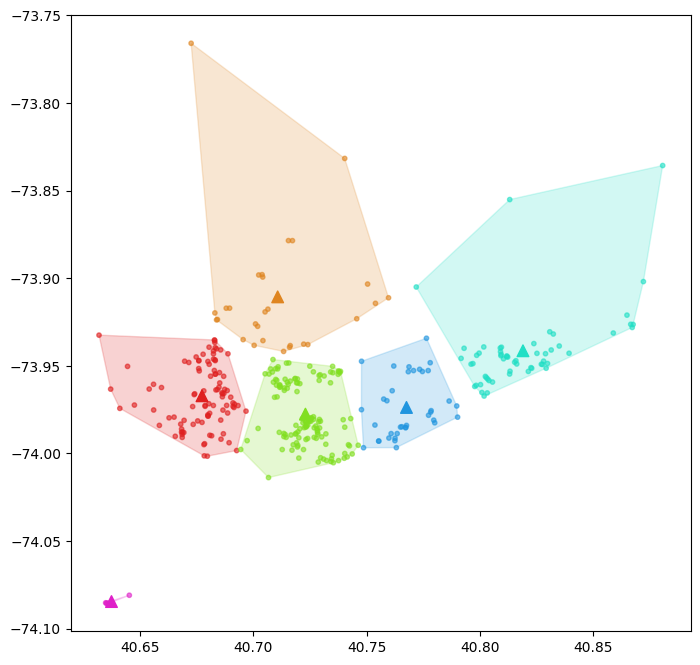

In [14]:
from scipy.spatial import ConvexHull 
import numpy as np

fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

В данном случае можно сказать, что среди элементов розового и зелёного кластеров содержатся выбросы, за счёт которых выпуклая оболочка стала большой. Элементы синего кластера наиболее похожи между собой, элементы красного довольно разнообразны относительно других кластеров.

→ Таким образом, если мы хотим лучше понять, какие данные находятся в кластерах, насколько сильно они схожи между собой или различны, на помощь придёт график Convex Hull.

### ДЕНДРОГРАММА

Данный способ визуализации необходим, если мы хотим визуализировать результаты иерархической кластеризации.

Из дендрограммы можно вынести много полезной информации. На дендрограмме можно:

наблюдать, как работал алгоритм: как объединялись (или разбивались) кластеры;
понять, насколько похожи соседние кластеры между собой;
предположить, какое количество кластеров можно было бы выбрать для кластеризации.

In [15]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

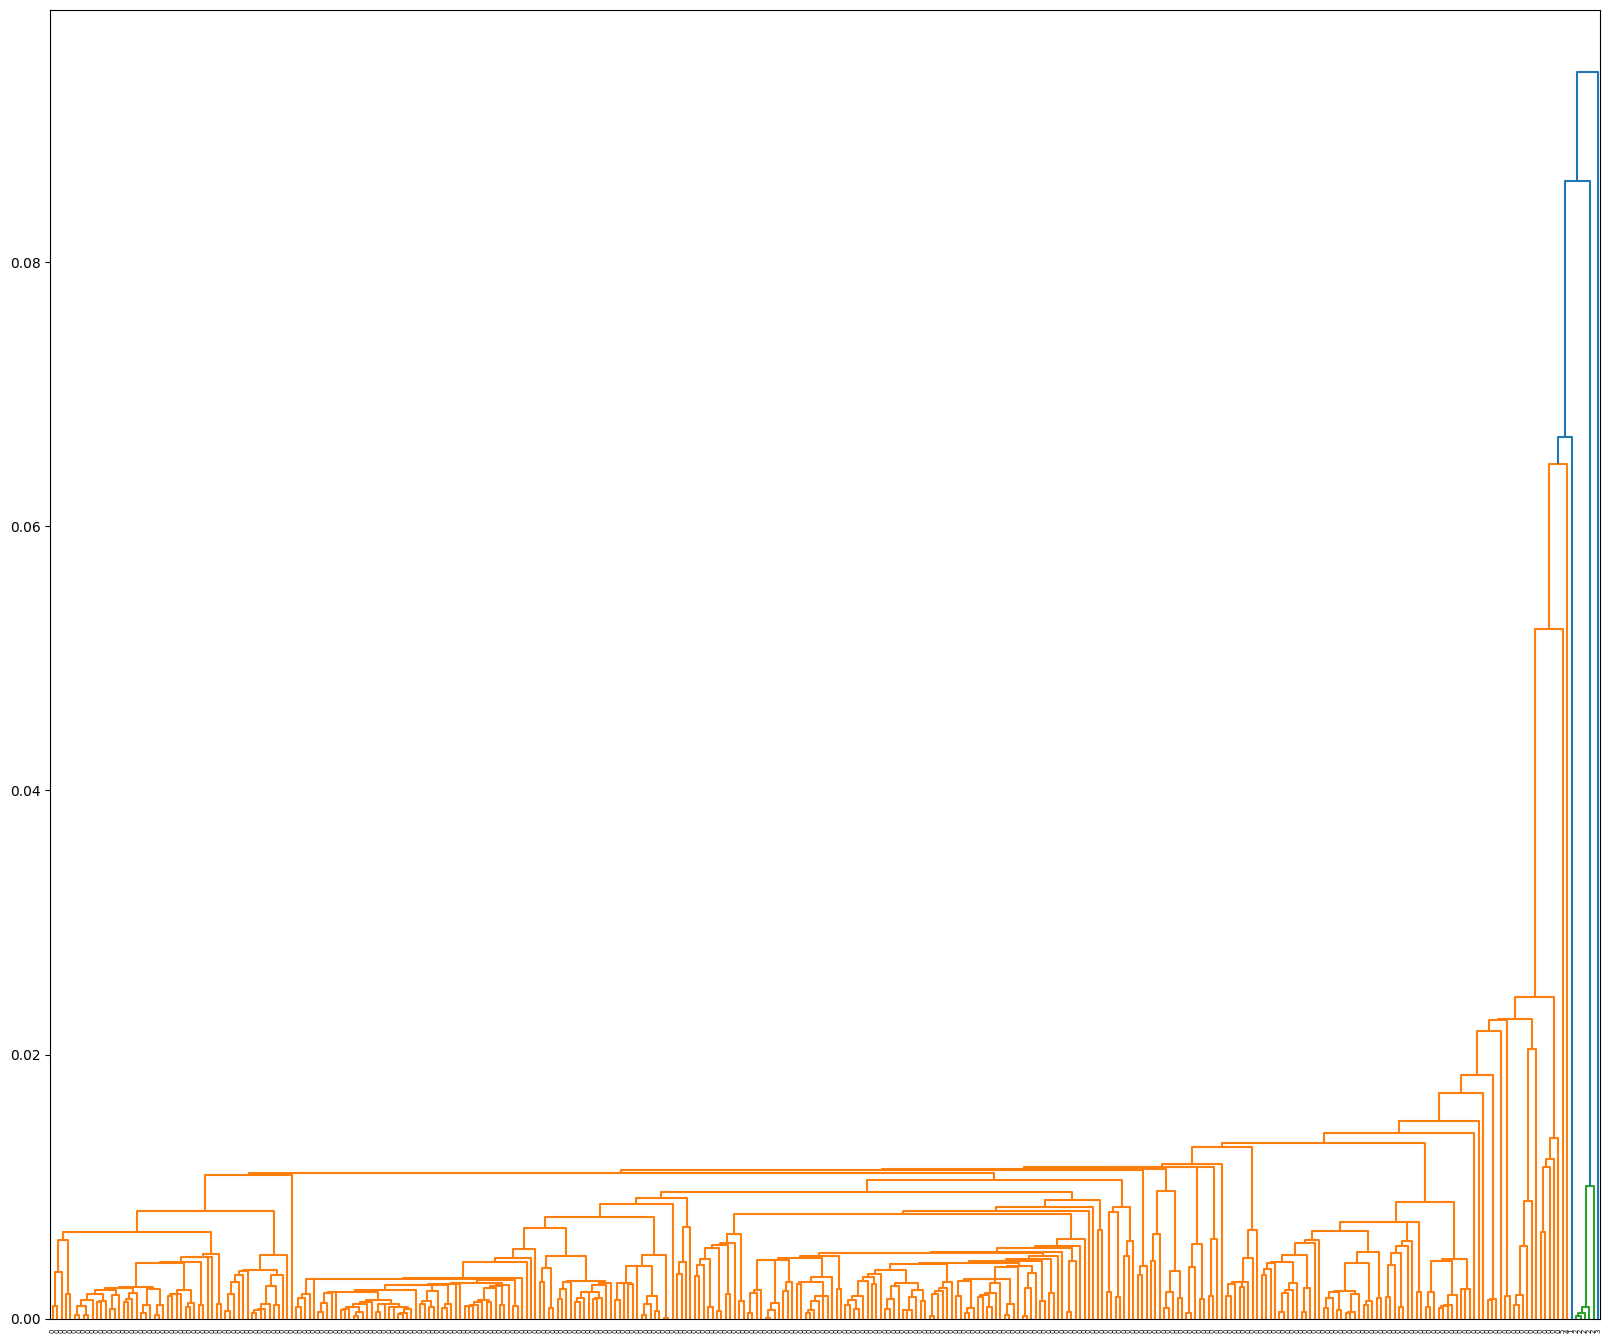

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

Так как данных немало, график получается несколько перегруженным. На дендрограмме можно наблюдать, как проходил процесс кластеризации: исходные элементы, находящиеся снизу, объединялись сначала в много мелких кластеров, затем эти кластеры объединялись между собой, пока в самом конце все кластеры не объединились в один большой.

### CLUSTERGRAM

Построение кластеров можно отследить только для иерархической кластеризации. Для k-means-кластеризации мы можем только визуализировать полученные кластеры. Однако иногда бывает интересно представить, как выглядели бы данные, если бы кластеров было, например, два, а не три.

Данная визуализация позволяет понять, что происходит с данными при разном количестве кластеров, и полезна при исследовательском анализе. Также она может быть полезна и для иерархической кластеризации, когда объектов много и дендрограмма получается сложной для понимания.

 Построить такой график можно не для всех алгоритмов кластеризации, а только для k-means, GMM и иерархической кластеризации. Метод кластеризации задаётся в поле method, по умолчанию выбрана k-means-кластеризация.

Установить данную библиотеку можно через pip:

pip install clustergram

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.013 seconds.
K=3 fitted in 0.000 seconds.
K=4 fitted in 0.000 seconds.
K=5 fitted in 0.017 seconds.
K=6 fitted in 0.000 seconds.
K=7 fitted in 0.000 seconds.
K=8 fitted in 0.017 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

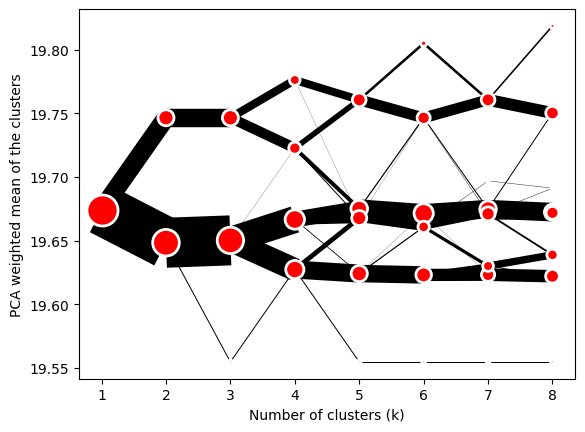

In [17]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

## 3D-ВИЗУАЛИЗАЦИЯ

Чтобы визуализировать результаты 3D-кластеризации, её необходимо сначала провести:

In [18]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Визуализация с помощью библиотеки Matplotlib:

In [24]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed